<a href="https://colab.research.google.com/github/KilovoIt/Unit-_1-revised/blob/main/Revised_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
sales_mean = sum(sales)/len(sales)
sales_variance = sum([(amount-sales_mean)**2 for amount in sales])/len(sales)
sales_stddev = sales_variance**(1/2)
print(str(sales_mean)+"\n"+str(sales_variance)+"\n"+str(sales_stddev))

3052.714285714286
183761.06122448976
428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [2]:
import numpy as np
import pandas as pd
customers = [127, 80, 105, 92, 120, 115, 93]
data = {'sales':sales, 'customers': customers}
df_sales = pd.DataFrame(data)
vcmatrix = df_sales.cov(ddof=0)
vcmatrix

,sales,customers
sales,183761.061224,6518.020408
customers,6518.020408,249.387755


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [3]:
customers_mean = sum(customers)/len(customers)
customers_variance = sum([(amount-customers_mean)**2 for amount in customers])/len(customers)
customers_stddev = customers_variance**(1/2)
print(str(customers_mean)+"\n"+str(customers_variance)+"\n"+str(customers_stddev))


104.57142857142857
249.3877551020408
15.792015549069118


              sales  customers
sales      1.000000   0.962834
customers  0.962834   1.000000


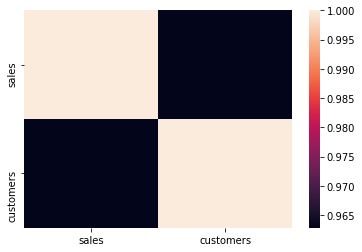

In [4]:
import seaborn as sns

print(df_sales.corr())

sns.heatmap(df_sales.corr())

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


             pclass  survived         age     sibsp     parch         fare
pclass     0.701589 -0.127042   -3.971123  0.053360  0.013495   -24.209265
survived  -0.127042  0.236138   -0.305395 -0.014234  0.034663     6.141324
age       -3.971123 -0.305395  165.259515 -2.548120 -1.450358   114.329139
sibsp      0.053360 -0.014234   -2.548120  1.084862  0.336686     8.635161
parch      0.013495  0.034663   -1.450358  0.336686  0.749081     9.920441
fare     -24.209265  6.141324  114.329139  8.635161  9.920441  2676.911604
            pclass  survived       age     sibsp     parch      fare
pclass    1.000000 -0.312122 -0.368798  0.061162  0.018615 -0.558629
survived -0.312122  1.000000 -0.048887 -0.028122  0.082418  0.244265
age      -0.368798 -0.048887  1.000000 -0.190305 -0.130355  0.171892
sibsp     0.061162 -0.028122 -0.190305  1.000000  0.373485  0.160238
parch     0.018615  0.082418 -0.130355  0.373485  1.000000  0.221539
fare     -0.558629  0.244265  0.171892  0.160238  0.221539  1

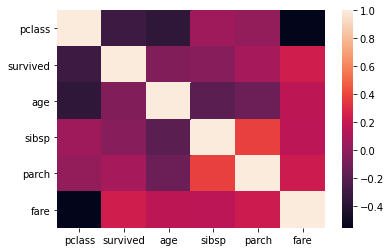

In [5]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df_titanic = pd.read_csv(url)
df_titanic.drop('Unnamed: 0', axis=1, inplace=True)
### Trying to use everything we can to calculate correlation and covariance matrices. 
df_titanic_numerical=df_titanic[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']]
df_titanic_numerical.dropna(inplace=True)
print(df_titanic_numerical.cov(ddof=0))
print(df_titanic_numerical.corr())

sns.heatmap(df_titanic_numerical.corr())


In [14]:
df_titanic.isnull().sum()

pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [25]:
### Dropping features with too many NaNs. They are not very much useful.
titanic_cleaned = df_titanic.drop(['body', 'cabin'], axis=1)
titanic_cleaned.dropna(inplace=True)
titanic_cleaned

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,S,2,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON",1
5,1.0,1.0,"Anderson, Mr. Harry",male,48.000000,0.0,0.0,19952,26.5500,S,3,"New York, NY",1
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.000000,1.0,0.0,13502,77.9583,S,10,"Hudson, NY",1
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.000000,2.0,0.0,11769,51.4792,S,D,"Bayside, Queens, NY",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,3.0,1.0,"Foo, Mr. Choong",male,29.881135,0.0,0.0,1601,56.4958,S,13,"Hong Kong New York, NY",0
818,3.0,1.0,"Gilnagh, Miss. Katherine ""Katie""",female,16.000000,0.0,0.0,35851,7.7333,Q,16,"Co Longford, Ireland New York, NY",0
819,3.0,1.0,"Glynn, Miss. Mary Agatha",female,29.881135,0.0,0.0,335677,7.7500,Q,13,"Co Clare, Ireland Washington, DC",0
820,3.0,1.0,"Goldsmith, Master. Frank John William ""Frankie""",male,9.000000,0.0,2.0,363291,20.5250,S,C D,"Strood, Kent, England Detroit, MI",0


In [30]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
### Encoding categorical data
titanic_cleaned['embarked'] = enc.fit_transform(titanic_cleaned.embarked)
titanic_cleaned['sex'] = enc.fit_transform(titanic_cleaned.sex)
titanic_cleaned['boat'] = enc.fit_transform(titanic_cleaned.boat)
titanic_cleaned['home.dest'] = enc.fit_transform(titanic_cleaned['home.dest'])



titanic_cleaned.drop(['name', 'ticket'], axis=1, inplace=True)




KeyError: ignored

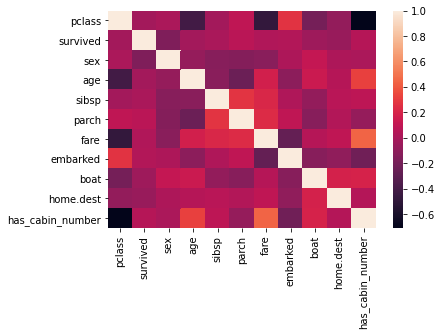

In [31]:
sns.heatmap(titanic_cleaned.corr())

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

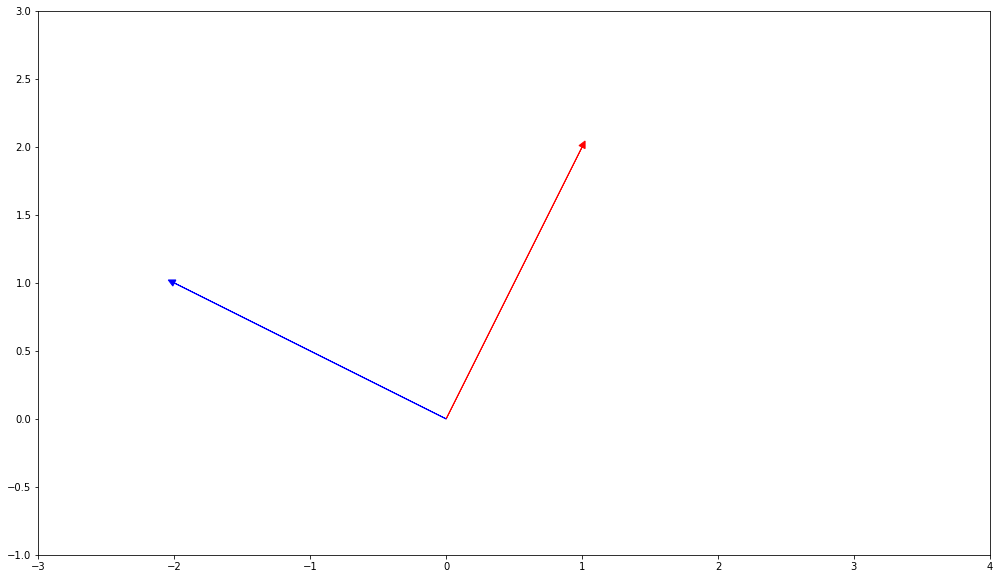

In [47]:
### Perpendicular vectors.
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
ax.set_aspect(1)
ax.arrow(0,0, 1, 2, head_width=.05, head_length=.05, color='red')
ax.arrow(0,0, -2, 1, head_width=.05, head_length=.05, color='blue')
ax.set(xlim=[-3, 4], ylim=[-1, 3])
plt.show()

In [44]:
import numpy as np

np.dot([1, 2], [-2, 1])

0

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [49]:
### Answering through using a ternary operator:
(False, True)[np.dot([-5, 3, 7], [6, -8, 2]) == 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  """Entry point for launching an IPython kernel.


False

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [61]:
c = np.array([2, -15, 6, 20])
print(np.linalg.norm(c))
print(np.dot(c, c))
print(np.matmul(c, c.T))



25.787593916455254
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\qquad
e = 2\begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0  \end{bmatrix} -8\begin{bmatrix} 0 \\ 0 \\ 1  \end{bmatrix}
\end{align}




## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [5]:
import numpy as np
f = np.array([4, 12, 11, 9, 2])
f/np.linalg.norm(f)

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [14]:
vector1 = np.array([[0, 0, 0, 3, 5, 4]])
vector2 = np.array([[0, 0 ,0, 6, 10, 8]])
vector3 = np.array([[0, 0, 0, 1, 3, 2]])
vector4 = np.array([[0, 0, 0, 5, 11, 2]])


import plotly.graph_objects as go
from plotly.subplots import make_subplots

X = [0, 0, 0, 0]
Y = [0, 0, 0, 0]
Z = [0, 0, 0, 0]
U = [3, 6, 1, 5]
V = [5, 10, 3, 11]
W = [4, 8, 2, 2]


fig = go.Figure(data=go.Cone(x=X, y=Y, z=Z, u=U, v=V, w=W, lighting_specular=2, colorscale='Blues', sizemode="absolute",
    sizeref=2,
    anchor="tip"))
fig.update_layout(scene = dict(
                    xaxis = dict(
                         backgroundcolor="rgb(255, 255, 255)",
                         gridcolor="rgb(17, 125, 233)",
                         showbackground=True,
                         zerolinecolor="black",),
                    yaxis = dict(
                        backgroundcolor="rgb(255, 255, 255)",
                        gridcolor="rgb(17, 125, 233)",
                        showbackground=True,
                        zerolinecolor="black"),
                    zaxis = dict(
                        backgroundcolor="rgb(255, 255,255)",
                        gridcolor="rgb(17, 125, 233)",
                        showbackground=True,
                        zerolinecolor="black",),),
                    width=700,
                    margin=dict(
                    r=10, l=10,
                    b=10, t=10)
                  )


fig.show()


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [6]:
#span{g} = R. g and h are linearly dependent.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [17]:
l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]
np.dot(m, n)
# span{l, m, n} = R**3

10

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



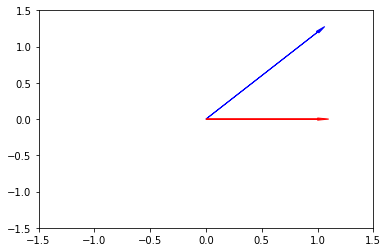

In [19]:
a = np.array([1, 1.2])
b = [1, 0]

import matplotlib.pyplot as plt
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.arrow(0,0, a[0], a[1], head_width=0.03, head_length=0.1, color='b')
plt.arrow(0,0, b[0], b[1], head_width=0.03, head_length=0.1, color='r')
plt.show()

## 6.2 What does it mean to form a basis?

To form a set of vectors so that every other vector in space can be described as a linear combination of these vectors multiplied by scalars.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [20]:
p = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])

np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?


How many linearly independent vectors are in there

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

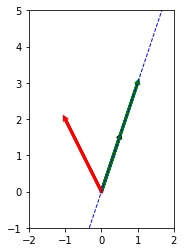

In [37]:

v = [1,3] 
w = [-1,2]
proj_coeff = np.dot(v, w)/(np.linalg.norm(v)**2)
proj=np.multiply(proj_coeff, v)

fig1 = plt.figure()
ax1 = plt.subplot(111)

x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
ax1.plot(x_vals, y_vals, '--', color='b', linewidth=1)
ax1.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='black')
ax1.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
ax1.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
ax1.set_aspect(1)
ax1.set(xlim=[-2, 2], ylim=[-1, 5])
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

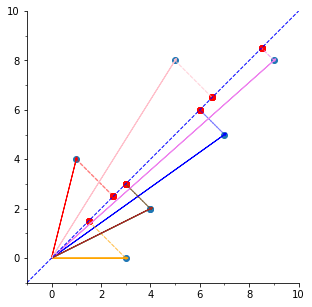

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]
colors = ['red', 'green', 'blue', 'orange', 'violet', 'brown', 'pink']
data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

def findProjection(a, b):
    coeff = np.dot([1, 1],[a, b])/2
    projection = np.multiply(coeff, [1, 1])
    return [ax2.scatter(projection[0], projection[1], color='r'), projection]



fig2 = plt.figure(figsize=(10, 5))
ax2 = plt.subplot(111)
ax2.scatter(df.x, df.y)
ax2.set_aspect('equal')
ax2.set(xlim=[-1, 10], ylim=[-1, 10])
ax2.xaxis.set_minor_locator(MultipleLocator(1))
ax2.yaxis.set_minor_locator(MultipleLocator(1))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.plot([-1, 10], [-1, 10], '--', color='b', linewidth=1)

for i in range(len(x_values)):
    ax2.arrow(0, 0, x_values[i], y_values[i], head_width=.1, head_length=0.1, color =colors[i])
    findProjection(x_values[i], y_values[i])[0]
    ax2.arrow(findProjection(x_values[i], y_values[i])[1][0], findProjection(x_values[i], y_values[i])[1][1], x_values[i]-findProjection(x_values[i], y_values[i])[1][0], y_values[i]-findProjection(x_values[i], y_values[i])[1][1], color=colors[i], alpha=0.5, ls='--')



plt.show()